In [1]:
import pandas as pd

import sys
sys.path.append('../')

from helpers.utils import read_docx_to_dict, fetch_biggest_text, mark_use_row, check_text_likeness, parse_words
from helpers.utils import fetch_climate_words_in_words, fetch_climate_phrases_in_text, words_found_master_list, clean_lemmatized_words, lemmatize_words

from helpers.words import CLIMATE_CHANGE_RELATED_WORDS, CLIMATE_CHANGE_RELATED_PHRASES
from helpers.cc_words import CC_WORDS, CC_PHRASES

STATION = 'NBC'

filename = f"data/{STATION}/Analysis_Colorado_Fire_12_30_21All_NBC.docx"

In [2]:
data = read_docx_to_dict(filename)

In [3]:
pd.options.display.max_rows = 500

# create dataframe
df = pd.DataFrame.from_dict(data)
len(df)

120

In [98]:
df['matches'] = df.apply(lambda row: check_text_likeness(df, row['text']), axis=1)

In [99]:
from helpers.utils import fetch_biggest_text, mark_use_row

In [119]:
df['row_to_use'] = df.apply(lambda row: fetch_biggest_text(df, row['matches']), axis=1)

In [120]:
mark_use_row(df)

'done'

In [136]:
df['text']= df['text'].str.lower()

df['words'] = df['text'].str.lower().str.replace(',', '').str.replace('>', '').str.replace('.', '').str.replace('\n', '').str.replace('’', "'").str.replace(
    '!', '').str.replace('?', '').str.replace('%', '').str.replace(')', '').str.replace('(', '').str.replace('_', '').str.replace(':', '').str.strip().str.split(' ')

/Users/loren/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/loren/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [137]:
import sys
sys.path.append('../')

from helpers.utils import parse_words
df['clean_words'] = df.apply(lambda row: parse_words(row['words']), axis=1)

In [171]:
from colorama import Back

def highlight(word, text):
    highlighted_word = f'***{word}***' #Back.CYAN + word + Back.RESET
    
    if word in text:
        return text.replace(word, highlighted_word)
    else:
        return ''


def highlight_text(climate_words, text):
    if not climate_words:
        return ''
    
    return [highlight_word(word, text) for word in climate_words][0]
    

In [139]:
from helpers.utils import fetch_climate_words_in_words, fetch_climate_phrases_in_text
df['climate_phrases_found'] = df.apply(lambda row: fetch_climate_phrases_in_text(row['text']), axis=1)
df['climate_words_found'] = df.apply(lambda row: fetch_climate_words_in_words(row['clean_words']), axis=1)

In [172]:
df['highlighted_words'] = df.apply(lambda row: highlight_text(row['climate_words_found'], row['text']), axis=1)
df['highlighted_phrases'] = df.apply(lambda row: highlight_text(row['climate_phrases_found'], row['text']), axis=1)

In [180]:
df.head()

,time,location,station,text,matches,row_to_use,use_row,words,clean_words,climate_phrases_found,climate_words_found,highlighted_words,highlighted_phrases
0,2021-12-30 6:26 PM,Denver,KUSA,that are being lost further into the neighborh...,[0],0,True,"[that, are, being, lost, further, into, the, n...","[that, are, being, lost, further, into, the, n...",[],"[high, wildfire]",that are being lost further into the neighborh...,
1,2021-12-30 6:25 PM,Denver,KUSA,"would be a different story. yeah, can we show ...",[1],1,True,"[would, be, a, different, story, yeah, can, we...","[would, be, a, different, story, yeah, can, we...",[],[],,
2,2021-12-30 6:24 PM,Denver,KUSA,you go three houses down and the house is stil...,[2],2,True,"[you, go, three, houses, down, and, the, house...","[you, go, three, houses, down, and, the, house...",[],[],,
3,2021-12-30 6:23 PM,Denver,KUSA,"well, and i think tom, one thing that becomes ...",[3],3,True,"[well, and, i, think, tom, one, thing, that, b...","[well, and, i, think, tom, one, thing, that, b...",[],[],,
4,2021-12-30 6:22 PM,Nashville,WSMV,"year. breaking news at 6, thousands of people ...",[4],4,True,"[year, breaking, news, at, 6, thousands, of, p...","[year, breaking, news, at, thousands, of, peop...",[],[],,


In [177]:
from docx import Document

start = '\x1b[1m\x1b[91m\x1b[4m'
stop = '\x1b[0m'

document = Document()
document.add_heading('NBC Highlighted Words Segment')
for text in df['highlighted_words']:
    
    document.add_paragraph(text)


document.add_page_break()

document.save('reports/nbc_highlighted_words.docx')



ValueError: All strings must be XML compatible: Unicode or ASCII, no NULL bytes or control characters

In [142]:
# save data to csv
df.to_csv('reports/nbc_all.csv', encoding='utf-8')
df.to_excel('reports/nbc_all.xlsx', engine='xlsxwriter', encoding='utf-8')

# https://stackoverflow.com/questions/50495463/unable-to-change-font-color-in-excel-using-python-xlsxwriter

In [143]:
unique_df = df[df['use_row']]

In [144]:
total_words = unique_df['clean_words'].str.len().sum()
total_words

16442

In [145]:
from helpers.utils import words_found_master_list

words_found = words_found_master_list(unique_df['clean_words'])
len(words_found)

16442

In [146]:
from helpers.utils import clean_lemmatized_words, lemmatize_words
clean_lemma_words = clean_lemmatized_words(lemmatize_words(words_found))


In [147]:
from nltk.probability import FreqDist

lfdist = FreqDist(clean_lemma_words)
lfdist

FreqDist({'fire': 215, 'home': 134, 'wind': 111, 'know': 97, 'go': 96, 'see': 91, 'right': 83, 'area': 73, 'one': 66, 'people': 60, ...})

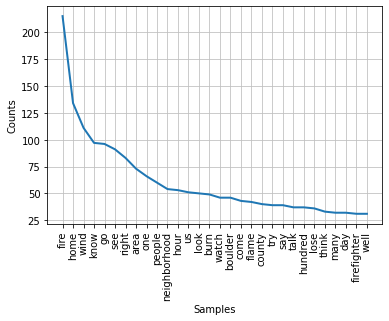

In [148]:
import matplotlib.pyplot as plt
lfdist.plot(30,cumulative=False)
plt.show()

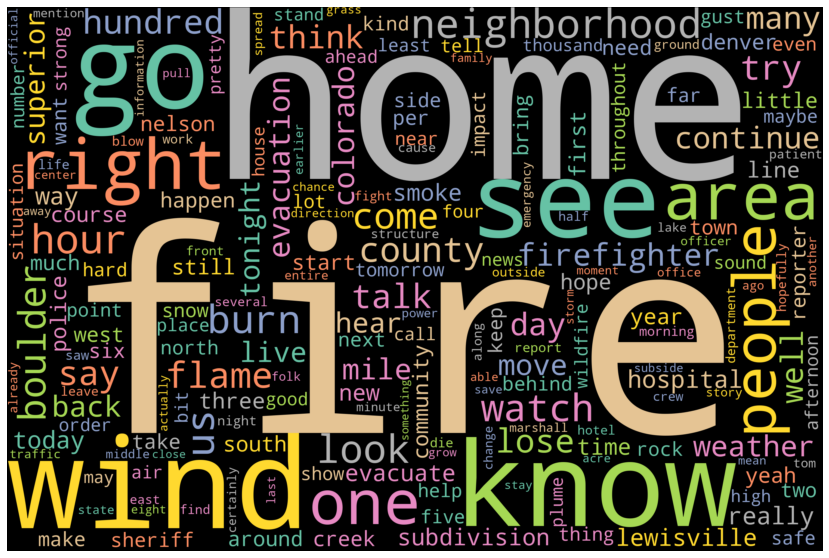

In [149]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

from helpers.utils import master_stopwords_list

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = master_stopwords_list()).generate_from_frequencies(lfdist)

# Plot
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#plt.savefig('word_cloud.png')

In [188]:
df

,time,location,station,text,matches,row_to_use,use_row,words,clean_words,climate_phrases_found,climate_words_found,highlighted_words,highlighted_phrases
0,2021-12-30 6:26 PM,Denver,KUSA,that are being lost further into the neighborh...,[0],0,True,"[that, are, being, lost, further, into, the, n...","[that, are, being, lost, further, into, the, n...",[],"[high, wildfire]",that are being lost further into the neighborh...,
1,2021-12-30 6:25 PM,Denver,KUSA,"would be a different story. yeah, can we show ...",[1],1,True,"[would, be, a, different, story, yeah, can, we...","[would, be, a, different, story, yeah, can, we...",[],[],,
2,2021-12-30 6:24 PM,Denver,KUSA,you go three houses down and the house is stil...,[2],2,True,"[you, go, three, houses, down, and, the, house...","[you, go, three, houses, down, and, the, house...",[],[],,
3,2021-12-30 6:23 PM,Denver,KUSA,"well, and i think tom, one thing that becomes ...",[3],3,True,"[well, and, i, think, tom, one, thing, that, b...","[well, and, i, think, tom, one, thing, that, b...",[],[],,
4,2021-12-30 6:22 PM,Nashville,WSMV,"year. breaking news at 6, thousands of people ...",[4],4,True,"[year, breaking, news, at, 6, thousands, of, p...","[year, breaking, news, at, thousands, of, peop...",[],[],,


In [150]:
import pandas as pd
pd.options.display.max_rows = 500
words_df = pd.DataFrame(lfdist.items(), columns=['Word', 'Count'])

words_df.sort_values(by=['Count'], ascending=False, inplace=True)
len(words_df)
# 1374 total words

words_df['Count'].sum()

7688

                     counts
Words                      
Climate-related         117
Non Climate-related    7571


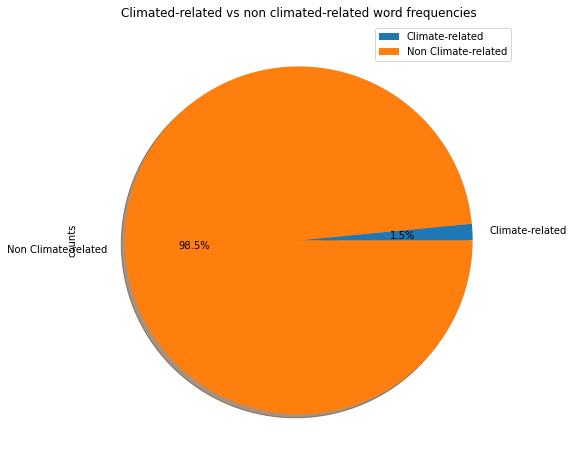

In [185]:
import sys
sys.path.append('../')
from helpers.words import CLIMATE_CHANGE_RELATED_WORDS, CLIMATE_CHANGE_RELATED_PHRASES
from helpers.cc_words import CC_WORDS, CC_PHRASES


# create data
climate_change_words_df = words_df.loc[words_df['Word'].isin(CLIMATE_CHANGE_RELATED_WORDS)]

climate_words_count = climate_change_words_df['Count'].sum()
non_climate_words_count = words_df['Count'].sum() - climate_words_count

comparison_df = pd.DataFrame({'Words': ['Climate-related', 'Non Climate-related'],
                             'counts': [climate_words_count, non_climate_words_count]})
comparison_df.set_index('Words', inplace=True)
print(comparison_df)

plot = comparison_df.plot.pie(y='counts', title="Climated-related vs non climated-related word frequencies", legend=True, autopct='%1.1f%%', shadow=True, figsize=(8, 8))

fig = plot.get_figure()
#fig.savefig("comparison.png")

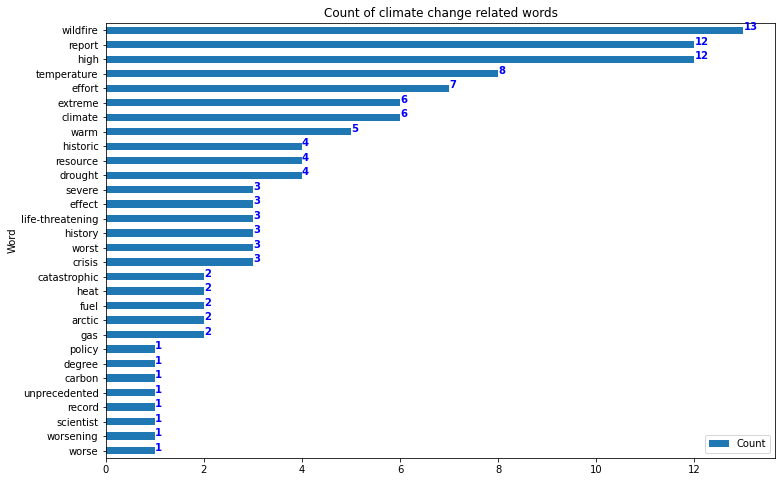

In [186]:
# find climate related word frequencies

# set figure size
fig, ax = plt.subplots(figsize=(12, 8))
# plot horizontal bar plot
climate_change_words_df.sort_values(by='Count').plot.barh(x="Word", y="Count", ax=ax)
# set the title
plt.title("Count of climate change related words")

for i, v in enumerate(climate_change_words_df['Count'].sort_values()):
    ax.text(v, i , str(v),
            color = 'blue', fontweight = 'bold')

plt.show()
# plt.savefig('climate-related-words-breakdown.png', transparent=False)

In [184]:
# find segments
climate_change_words_found = list(climate_change_words_df['Word'].unique())
climate_change_words_found

['wildfire',
 'extreme',
 'forecast',
 'climate',
 'coal',
 'drought',
 'hot',
 'heat',
 'risk',
 'gas',
 'carbon',
 'extremely',
 'glacier',
 'scientist']

In [187]:
# find segments
climate_change_words_found = list(climate_change_words_df['Word'].unique())
climate_change_words_found

['wildfire',
 'report',
 'high',
 'temperature',
 'effort',
 'extreme',
 'climate',
 'warm',
 'historic',
 'resource',
 'drought',
 'effect',
 'life-threatening',
 'severe',
 'history',
 'worst',
 'crisis',
 'catastrophic',
 'heat',
 'fuel',
 'arctic',
 'gas',
 'degree',
 'carbon',
 'unprecedented',
 'record',
 'scientist',
 'worsening',
 'policy',
 'worse']

In [154]:
unique_df[unique_df["climate_words_found"].str.len() != 0].to_csv('reports/abc_final.csv', encoding='utf-8')

In [155]:
# total segments
total_segments = len(df)
total_segments

120

In [156]:
# unique segments
unique_segments = len(df[df['use_row'] == True])
unique_segments

98

In [157]:
# how many segments had climate related words/phrases — %
possible_climate_related_segments = len(df[(df["climate_words_found"].str.len() != 0) & (df["use_row"] == True)])
possible_climate_related_segments


f'{possible_climate_related_segments / unique_segments * 100.0} %'
# https://stackoverflow.com/questions/50495463/unable-to-change-font-color-in-excel-using-python-xlsxwriter

'43.87755102040816 %'